In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date

In [2]:
from sklearn.externals import joblib

In [23]:
from sklearn.metrics import mean_absolute_error

In [3]:
# Load Train Data
rawdata = pd.read_csv('../data/raw/train_aggr.csv',sep=';')

In [4]:
rawdata.head()

,id_pos,fecha_venta_norm,canal,unidades,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
0,3142,2012-12-01,ALMACEN,12,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
1,3142,2013-12-01,ALMACEN,7,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
2,3143,2013-11-01,ALMACEN,2,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
3,3143,2013-12-01,ALMACEN,47,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
4,3144,2012-11-01,ALMACEN,6,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233


In [5]:
rawdata.shape

(34540, 36)

In [6]:
rawdata['fecha_venta_norm'] = pd.to_datetime(rawdata['fecha_venta_norm'])

In [7]:
rawdata['fecha_venta_norm'] = rawdata['fecha_venta_norm'].dt.date

In [8]:
# Filtramos los meses que consideramos buenos para el entrenamiento (11 y 12)
rawdata = rawdata[rawdata.fecha_venta_norm.isin([date(2012, 11, 1),date(2012, 12, 1),
                                                date(2013, 11, 1), date(2013, 12, 1), date(2014, 11, 1)])]

In [9]:
predictors = ['id_pos','unidades', 'canal', 'competidores',
       'ingreso_mediana', 'densidad_poblacional',
       'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24',
       'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44', 'pct_45a49',
       'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69', 'pct_70a74',
       'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors',
       'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta',
       'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata',
       'mediana_valor_hogar']

In [10]:
X = rawdata[predictors].copy()

In [11]:
y = rawdata.unidades

In [12]:
X.drop('unidades', inplace=True, axis=1)

In [13]:
# fill Nans
for c in X.columns[X.dtypes != 'object']:
    X[c].fillna(X[c].median(), inplace=True)

In [14]:
# Label encoder
for c in X.columns[X.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

#### Training Random Forest Regressor

In [15]:
rf = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=200,criterion='mae',n_jobs=-1)

In [16]:
model = rf.fit(X, y)


In [20]:
model

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

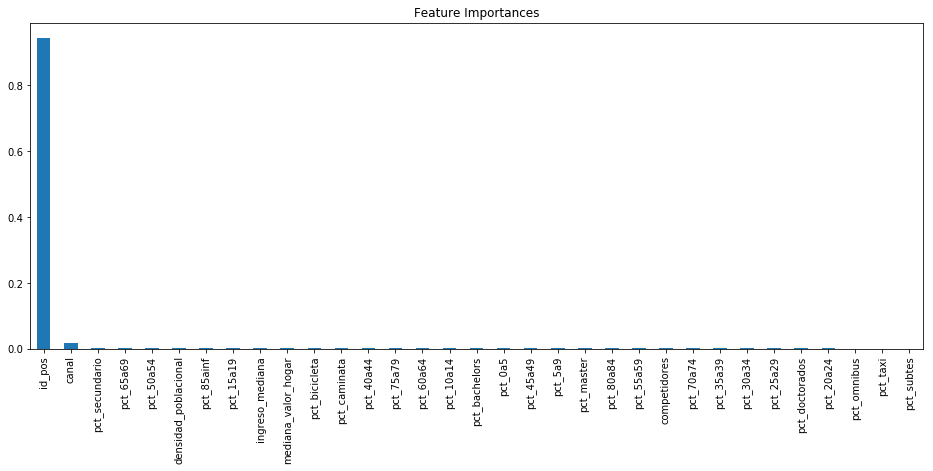

In [30]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(16,6))
pass

In [31]:
y_pred = model.predict(X)

In [32]:
mean_absolute_error(y, y_pred)

13.22050957008245

In [33]:
np.median(y_pred)

13.615

In [34]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [29]:
joblib.dump(model, '../models/rf_baseline.pkl') 

['../models/rf_baseline.pkl']